# Generative topographic mapping

# Intuition

# Definition

The GTM defines a non-linear, parametric mapping $f(\textbf{x},\textbf{W})$ from a $M$-dimensional latent space to a $D$-dimensional data space where $M<D$. We will define $f(\textbf{x},\textbf{W})$ to be continious and differentiable. Since the latent space is $M$-dimensional, these points will be confined to an $L$-dimensional manifold non-linearly embedded in the $D$-dimensional data space. 

Let us define a probability distribution over the latent space $p(\textbf{x})$ and this would also induce a corresponding distribution on the data space. Since this distribution would be singular, we can convolve it with an isotropic Gaussian distribution arriving at the following formula for the distribution of the sample data $\textbf{y}$ in data space:
\begin{equation}
p(\textbf{y} \lvert \textbf{x}, \textbf{W}, \beta) = \mathcal{N}\left( f(\textbf{x},\textbf{W}), \beta \right) 
\end{equation}
where $\textbf{y}$ is a point from the data and  $\beta^{-1}$ denotes the noise variance. This can be thought of as smearing out of the manifold giving it a bit of volume. 
We can intergrate out the latent projection variables to express a distribution over the data in terms of the model parameters $\beta$ and $\textbf{W}$: 
\begin{equation}
p(\textbf{y} \lvert \textbf{W},\beta) = \int p(\textbf{y}\lvert \textbf{x},\textbf{W},\beta)p(\textbf{x})d\textbf{x}
\end{equation}
If we choose $p(\textbf{x})$ to have a particular form, such as a set of $K$ equally weighted delta functions on a regular grid $p(\textbf{x}) = \frac{1}{K} \sum_{k=1}^K \delta(\textbf{x} - \textbf{x}_k)$ the integral turns into an easier to deal with sum:
\begin{equation}
p(\textbf{y} \lvert \textbf{W},\beta) = \frac{1}{K} \sum_{k=1}^K p(\textbf{y} \lvert \textbf{x}_k, \textbf{W}, \beta)
\end{equation}

Now we have a model where each delta function centre maps to the centre of a Gaussian which lies in the manifold embedded in the data space. Note that as long as $f\left(\textbf{x},\textbf{W}\right)$ is continious, the ordering of the latent points will be reflected in the ordering of the centres of Gaussians in the data space. What we have is a constrained mixture model in which the mixture components cannot move independently of each other, but all depend on the mapping $f(\textbf{x},\textbf{W})$. Also, all components of the mixture share the same variance $\beta ^{-1}$ and the mixing coefficients are all fixed to $1/K$.

Given a finite set of i.i.d. data points ${ \textbf{y}_1,\dots,\textbf{y}_N }$, we can write down the likelihood function for this model:
\begin{equation}
\mathcal{L} = \prod^{N}_{n=1}p\left(\textbf{y}_n \lvert W,\beta \right) = \prod _{n=1}^N \left[\frac{1}{K}\sum_{k=1}^K p\left(\textbf{y}_n \lvert \textbf{x}_k, \textbf{W}, \beta \right) \right]
\end{equation}
During training then we can maximize the likelihood with respect to $\textbf{W}$ and $\beta$. This is equivalent to maximizing the log-likelihood:
\begin{equation}
\log \left({\mathcal{L}}\right) = \sum_{n=1}^N \ln\left( \frac{1}{K} \sum_{k=1}^K p(\textbf{y}_n \lvert \textbf{x}_k,W,\beta )\right)
\end{equation}
Once the likelihood/log-likelihood has been specified, optimization can be done using any non-linear optimization technique, but standard GTM is trained using $\textit{expectation-maximization}$ $(\textbf{E-M})$ algorithm:



Given some initial values for $\textbf{W}$ and $\beta$, the $\textbf{E}$-step for the GTM is the same as for a general Gaussian mixture model, so we compute the responsibilities:
\begin{equation}
r_{kn} = p\left( \textbf{x}_k \lvert \textbf{y}_n, \textbf{W}, \beta \right) = \frac{p(\textbf{y}_n \lvert \textbf{x}_k, \textbf{W}, \beta)p(\textbf{x}_k)}{\sum_j p\left(\textbf{y}_n \lvert \textbf{x}_j,\textbf{W},\beta\right)p(\textbf{x}_j)}
\end{equation}
assumed by the $k$-th component of the Gaussian mixture for the $n$th data point, for each possible pair of $k$ and $n$. $r_{kn}$ corresponds to the $\textit{posterior}$ probability that the $n$th data point was generated by the $k$th component.  All $p(\textbf{x}_j)$ are defined to be equal, hence they drop out from the responsibility term above.

In the $\textbf{M}$-step, these responsibilities acts as weights in the update equations for $\textbf{W}$ and $\beta$. In essence, we will try to move each component of the mixture towards data points for which it is most responsible.

So far we have not specified the form for $f(\textbf{x},\textbf{W})$. For the GTM, we normally choose a $\textit{generalised linear regression model}$, where $f$ is a linear combination of a set of fixed basis functions, 
\begin{equation}
f_d(\textbf{x},\textbf{W}) = \sum_{m=1}^M \phi_m(\textbf{x})w_{md}
\end{equation}


The choice of basis functions determines to a large extend the type of linear/non-linear mappings that the GTM applies to the high dimensional input space. Wide range of basis functions are considered in the scientific literature, but here we will only look at few basic ones:
 - non-normalized Gaussian basis functions - $\phi_m(\textbf{x}) = \exp \left( -\frac{\lVert{ \textbf{x} - \mu_m \rVert}^2}{2\sigma^2} \right)$ where $\mu_m$ denote the centres of the Gaussian basis functions and $\sigma$ is their common width
 - linear basis functions, for capturing linear trends in the data - $\phi_m(\textbf{x}) = x^l$ where $x^l$  denotes the $l$-th element of $\textbf{x}$
 - fixed basis functions (typically only one) that allows the corresponding weights to act as biases: $\phi_m(\textbf{x}) = 1$

A standard assumption to make will be that the first $M_{NL}$ basis functions are the non-linear Gaussian basis functions $\phi_m(\textbf{x})$, then the next $L$ basis functions are the linear basis functions and the last term is the fixed basis functions. This means that the $M$-dimensional latent space is spanned by $M_{NL}$ non-linear basis, $L$ linear basis and $1$ fixed where the total number of basis functions adds up to $M$. 
It is convinient to write the expression for $f_d(\textbf{x},\textbf{W})$ in matrix form:
\begin{equation}
\textbf{F} = \Phi \textbf{W}
\end{equation}
where $\textbf{F}$ is a $K\times D$ matrix of mixture component centres, $\Phi$ is a $K\times M$ matrix with elements $\Phi_{km} = \phi_m(\textbf{x}_k)$, and $\textbf{W}$ is a $M\times D$ matrix containing the weight and the bias parameters. 

In the $\textbf{M}$-step we calculate the derivatives of the log-likelihood with respect to the weights $w_{md}$:
\begin{equation}
\frac{\partial l}{\partial w_{md}} = \sum_{n=1}^N \sum_{k=1}^K r_{kn} \beta \left( \sum_{m'}^M \phi_{m'}(\textbf{x}_k)w_{m'd} - y_{nd}  \right)\phi(\textbf{x}_k)
\end{equation}
where $r_{kn}$ are the responsibilities computed in the preceeding $\textbf{E}$-step. Setting these derivatives to zero we obtain the update formula for $\textbf{W}$. 
We also need to derive an update for $\beta$, similarly, these are obtained after computing the derivative of the log-likelihood with respect to $\beta$ and setting it to zero resulting in the update:
\begin{equation}
\frac{1}{\beta} = \frac{1}{ND} \sum_{n=1}^N \sum_{k=1}^K r_{kn} \lVert f(\textbf{x}_k, \textbf{W}) - \textbf{y}_n \rVert ^2
\end{equation}
where note that we use the already updated weights $\textbf{W}$. Intuitively, this means that we set $\beta^{-1}$ to the average weighted distance between mixture components and data points.

In matrix form, the $\textbf{M}$-step updated for $\textbf{W}$ can be written as 
\begin{equation}
\Phi^T \textbf{G} \Phi \textbf{W} = \Phi^T \textbf{R} \textbf{Y}
\end{equation}
where $\textbf{Y}$ is a $N\times D$ matrix containing the data points, $\textbf{R}$ is the $K\times N$ responsibility matrix with elements $r_{kn}$ and $\textbf{G}$ is a $K\times K$ diagonal matrix with entries
\begin{equation}
g_{kk} = \sum_{n=1}^N r_{kn}
\end{equation}
Note that the update for $\textbf{W}$ can now be obtained directly using matrix inversion and multiplication of few matrices. A different model might have required non-linear iterative maximization at each iteration of the $\textbf{E-M}$ algorithm. 

# Initialization

As in most iterative training algorithms we have seen so far in the course, there is a choice to be made about the initial values of the model parameters $\textbf{W}$ and $\beta$. Two common solutions are values for $\textbf{W}$ being random Gaussian samples or values for the weights $\textbf{W}$ being selected using principal component analysis (PCA). 
If $\textbf{W}$ is initialized randomly, we typically assume each element of $\textbf{W}$ is drawn from a Gaussian distribution $\mathcal{N}\left( 0, \eta \right)$ where $\eta$ can vary accross dimensions and is set to the variance of the training data.
In PCA initialization, we selected the values for the weights of the linear basis to be the weights implied by the first $L$ eigenvectors after applying PCA to the training data. The weights associated with the nonlinear basis functions can be set to zero or small random numbers. The weight for the bias term is usually selected to match the mean of all the training data.
If $\textbf{W}$ are initialized randomly, $\beta$ is set to the reciprocal of the average squared distance between the centres of the Gaussian mixtures and the points in our dataset.
If $\textbf{W}$ is initialized using PCA, $\beta$ is set to the largest of the two:
 - the length of the $(L+1)$-th principal component, i.e. the largest variance orthogonal to the $L$-dimensional hyperplane to which the Gaussian mixture is initially mapped
 - half of the average minimal distance between the mixture components

# Summary 

The generative topographic mapping training algorithm can be summarized as follows:

Generate the grid of latent points ${\textbf{x}_k}$, $k=1,\dots,K$.
<br>
Generate the grid of basis function centres ${\mu_m}$, $m=1,\dots,M$.
<br>
Select the basis function width $\sigma$.
<br>
Compute the m<br>atrix of basis function activations, $\Phi$.
<br>
Initialize $W$ using one of the two specified criteria.
<br>
Initialize $\beta$.
<br>
If desired, select a value for $\alpha$.
<br>
Compute $\Delta$, $\Delta_{kn} = \lVert \textbf{y}_n - \Phi_k \textbf{W} \rVert ^2$.
<br>
$\textbf{repeat}$
<br>
    ($\textbf{E}$ - step)
<br>
    Compute $\textbf{R}$ using $\Delta$ and $\beta$.
<br>
    Compute $\textbf{G}$ using $\textbf{R}$.
<br>
($\textbf{M}$ - step)
<br>
    $W = \left( \Phi^T \textbf{G}\Phi + \lambda\textbf{I} \right)^{-1}\Phi^{T}\textbf{R}\textbf{Y}$ where $\lambda$     may be zero.
<br>
    Compute $\Delta$, $\Delta_{kn} = \lVert \textbf{y}_n - \Phi_k W \rVert^2$.
<br>
Update $\beta$ using $\textbf{R}$ and $\Delta$.

You can install an example pygtm implementation using

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

from pygtm import GTM

In [88]:
iris = load_iris()

model = make_pipeline(
    StandardScaler(),
    GTM(n_components=2, max_iter=50, tol=1e-2, verbose=True)
)

In [91]:
model.fit(iris.data)

cycle #1: likelihood: -241.814, diff: 3.621
cycle #2: likelihood: -162.175, diff: 0.531
cycle #3: likelihood: -98.627, diff: 0.424
cycle #4: likelihood: -48.805, diff: 0.332
cycle #5: likelihood: -8.090, diff: 0.271
cycle #6: likelihood: 25.795, diff: 0.226
cycle #7: likelihood: 54.735, diff: 0.193
cycle #8: likelihood: 80.808, diff: 0.174
cycle #9: likelihood: 105.018, diff: 0.161
cycle #10: likelihood: 127.582, diff: 0.150
cycle #11: likelihood: 148.485, diff: 0.139
cycle #12: likelihood: 167.626, diff: 0.128
cycle #13: likelihood: 184.876, diff: 0.115
cycle #14: likelihood: 200.168, diff: 0.102
cycle #15: likelihood: 213.617, diff: 0.090
cycle #16: likelihood: 225.493, diff: 0.079
cycle #17: likelihood: 236.144, diff: 0.071
cycle #18: likelihood: 245.831, diff: 0.065
cycle #19: likelihood: 254.545, diff: 0.058
cycle #20: likelihood: 262.208, diff: 0.051
cycle #21: likelihood: 268.946, diff: 0.045
cycle #22: likelihood: 274.985, diff: 0.040
cycle #23: likelihood: 280.527, diff: 0.037

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gtm', GTM(alpha=0.001, max_iter=50, method='mean', n_components=2, n_grids=20,
  n_rbfs=10, random_state=None, sigma=1, tol=0.01, verbose=True))])

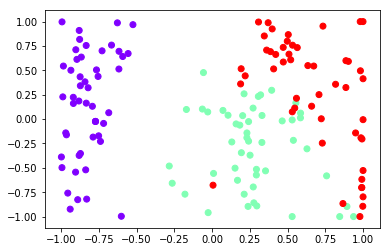

In [92]:
Xt = model.transform(iris.data)
plt.scatter(*Xt.T, c=iris.target, cmap=plt.cm.rainbow)
plt.show()

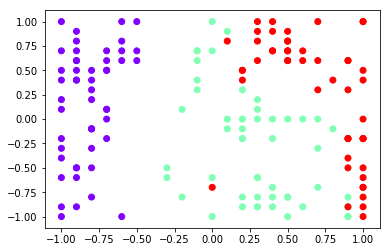

In [22]:
model.named_steps.gtm.method = 'mode'
Xt = model.transform(iris.data)
plt.scatter(*Xt.T, c=iris.target, cmap=plt.cm.rainbow)
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', header=None)
#df[4] = df[4].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

y, X = df.iloc[1:, 17].values, df.iloc[1:, np.r_[1:17,18:24]].values

In [24]:
X.astype(float)
Y = X.astype(float)

In [25]:
y = y.astype(float)

In [76]:
model = make_pipeline(
    StandardScaler(),
    GTM(n_components=2, max_iter=50, tol=1e-2, verbose=True)
)
model.fit(Y)

cycle #1: likelihood: -241.814, diff: inf
cycle #2: likelihood: -162.175, diff: 0.531
cycle #3: likelihood: -98.627, diff: 0.424
cycle #4: likelihood: -48.805, diff: 0.332
cycle #5: likelihood: -8.090, diff: 0.271
cycle #6: likelihood: 25.795, diff: 0.226
cycle #7: likelihood: 54.735, diff: 0.193
cycle #8: likelihood: 80.808, diff: 0.174
cycle #9: likelihood: 105.018, diff: 0.161
cycle #10: likelihood: 127.582, diff: 0.150
cycle #11: likelihood: 148.485, diff: 0.139
cycle #12: likelihood: 167.626, diff: 0.128
cycle #13: likelihood: 184.876, diff: 0.115
cycle #14: likelihood: 200.168, diff: 0.102
cycle #15: likelihood: 213.617, diff: 0.090
cycle #16: likelihood: 225.493, diff: 0.079
cycle #17: likelihood: 236.144, diff: 0.071
cycle #18: likelihood: 245.831, diff: 0.065
cycle #19: likelihood: 254.545, diff: 0.058
cycle #20: likelihood: 262.208, diff: 0.051
cycle #21: likelihood: 268.946, diff: 0.045
cycle #22: likelihood: 274.985, diff: 0.040
cycle #23: likelihood: 280.527, diff: 0.037
c

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gtm', GTM(alpha=0.001, max_iter=50, method='mean', n_components=2, n_grids=20,
  n_rbfs=10, random_state=None, sigma=1, tol=0.01, verbose=True))])

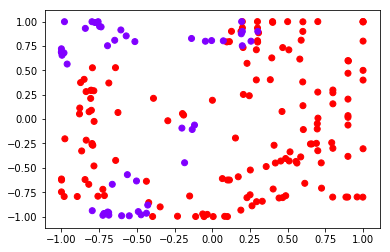

In [74]:
Xt = model.transform(Y)
plt.scatter(*Xt.T, c=y, cmap=plt.cm.rainbow)
plt.show()

In [96]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

    
def get_lattice_points(n_grid, n_components):
    grid = np.meshgrid(*[np.linspace(-1, 1, n_grid + 1) for _ in range(n_components)])
    return np.array([c.ravel() for c in grid]).T
    
def get_likelihood( phi, W, beta, X):
    p = np.exp((-beta / 2) * cdist(phi.dot(W), X, 'sqeuclidean'))
    R = p/ p.sum(axis=0)
    D = X.shape[1]
    k1 = (D / 2) * np.log(beta / (2 * np.pi))
    k2 = -(beta / 2) * cdist(phi.dot(W), X, 'sqeuclidean')
    return (R * (k1 + k2)).sum()
    
def gtm_fit(X, n_components=2, n_rbfs=10, sigma=1, alpha=1e-3, n_grids=20, method='mean',
             max_iter=10, tol=1e-3, verbose=False,random_state=None, **fit_params):        
        
    ################# Initialization###############
    prev_likelihood = -float('inf')
    # generate map
    z = get_lattice_points(n_grids, n_components=2)
    rbfs = get_lattice_points(n_rbfs, n_components=2)        
    d = cdist(z, rbfs, 'sqeuclidean')
    phi = np.exp(-d / (2 * sigma))
        
    # initialize W and beta from PCA
    pca = PCA(n_components=n_components + 1, random_state=random_state)
    pca.fit(X)
    W = np.linalg.pinv(phi).dot(z).dot(pca.components_[:n_components, :])
        
    betainv1 = pca.explained_variance_[n_components]
    inter_dist = cdist(phi.dot(W), phi.dot(W))
    np.fill_diagonal(inter_dist, np.inf)
    betainv2 = inter_dist.min(axis=0).mean() / 2
    beta = 1 / max(betainv1, betainv2)
        
    for i in range(max_iter):
        ############ Expectation step###############
        #Compute the reponsibility
        #p = np.exp((-self.beta / 2) * cdist(self.phi.dot(self.W), X, 'sqeuclidean'))/ p.sum(axis=0)
        p = np.exp((-beta / 2) * cdist(phi.dot(W), X, 'sqeuclidean'))
        R = p/ p.sum(axis=0)
        G = np.diag(R.sum(axis=1))
        ############ Maximization step##############
        W = np.linalg.solve(phi.T.dot(G).dot(phi) + (alpha / beta) * np.identity(phi.shape[1]), phi.T.dot(R).dot(X))
        
        beta = X.size / (cdist(phi.dot(W), X, 'sqeuclidean') * R).sum()
        # Compute the likelihood
        likelihood = get_likelihood(phi, W, beta, X)
        diff = abs(likelihood - prev_likelihood) / X.shape[0]
        prev_likelihood = likelihood
        if verbose:
            print('cycle #{}: likelihood: {:.3f}, diff: {:.3f}'.format(i + 1, likelihood, diff))
            
        if diff < tol:
            if verbose:
                print('converged.')
            break
                
    assert method in ('mean', 'mode')
    if method == 'mean':
       # p = np.exp((-beta / 2) * cdist(phi.dot(W), X, 'sqeuclidean'))
       # R = p/ p.sum(axis=0)
        return z.T.dot(R).T
    elif method == 'mode':
        return z[R.argmax(axis=0), :]


In [97]:
#Xt = gtm_fit(Y)
Xt = gtm_fit(Y, max_iter=50, tol=1e-2, verbose=True)

cycle #1: likelihood: -762.547, diff: inf
cycle #2: likelihood: -368.592, diff: 2.626
cycle #3: likelihood: -155.407, diff: 1.421
cycle #4: likelihood: -46.831, diff: 0.724
cycle #5: likelihood: 18.867, diff: 0.438
cycle #6: likelihood: 58.214, diff: 0.262
cycle #7: likelihood: 81.863, diff: 0.158
cycle #8: likelihood: 97.130, diff: 0.102
cycle #9: likelihood: 108.248, diff: 0.074
cycle #10: likelihood: 117.666, diff: 0.063
cycle #11: likelihood: 126.010, diff: 0.056
cycle #12: likelihood: 133.243, diff: 0.048
cycle #13: likelihood: 139.700, diff: 0.043
cycle #14: likelihood: 145.155, diff: 0.036
cycle #15: likelihood: 150.024, diff: 0.032
cycle #16: likelihood: 154.939, diff: 0.033
cycle #17: likelihood: 160.031, diff: 0.034
cycle #18: likelihood: 164.603, diff: 0.030
cycle #19: likelihood: 167.901, diff: 0.022
cycle #20: likelihood: 170.159, diff: 0.015
cycle #21: likelihood: 171.794, diff: 0.011
cycle #22: likelihood: 173.020, diff: 0.008
converged.


ValueError: c of shape (195,) not acceptable as a color sequence for x with size 150, y with size 150

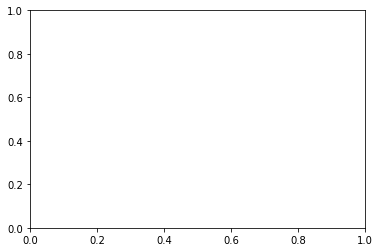

In [98]:
plt.scatter(*Xt.T, c=y, cmap=plt.cm.rainbow)
plt.show()

In [99]:
iris = load_iris()

#model = make_pipeline(
#    StandardScaler(),
#    GTM(n_components=2, max_iter=50, tol=1e-2, verbose=True)
#)
Y = iris.data
Xt = gtm_fit(Y, n_components=2, max_iter=50, tol=1e-2, verbose=True)

cycle #1: likelihood: -762.547, diff: inf
cycle #2: likelihood: -368.592, diff: 2.626
cycle #3: likelihood: -155.407, diff: 1.421
cycle #4: likelihood: -46.831, diff: 0.724
cycle #5: likelihood: 18.867, diff: 0.438
cycle #6: likelihood: 58.214, diff: 0.262
cycle #7: likelihood: 81.863, diff: 0.158
cycle #8: likelihood: 97.130, diff: 0.102
cycle #9: likelihood: 108.248, diff: 0.074
cycle #10: likelihood: 117.666, diff: 0.063
cycle #11: likelihood: 126.010, diff: 0.056
cycle #12: likelihood: 133.243, diff: 0.048
cycle #13: likelihood: 139.700, diff: 0.043
cycle #14: likelihood: 145.155, diff: 0.036
cycle #15: likelihood: 150.024, diff: 0.032
cycle #16: likelihood: 154.939, diff: 0.033
cycle #17: likelihood: 160.031, diff: 0.034
cycle #18: likelihood: 164.603, diff: 0.030
cycle #19: likelihood: 167.901, diff: 0.022
cycle #20: likelihood: 170.159, diff: 0.015
cycle #21: likelihood: 171.794, diff: 0.011
cycle #22: likelihood: 173.020, diff: 0.008
converged.


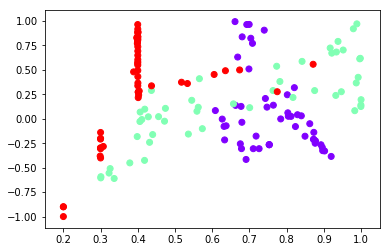

In [100]:
plt.scatter(*Xt.T, c=iris.target, cmap=plt.cm.rainbow)
plt.show()